In [11]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
hassan06_nslkdd_path = kagglehub.dataset_download('hassan06/nslkdd')

print('Data source import complete.')


100%|██████████| 13.9M/13.9M [00:02<00:00, 5.32MB/s]

Extracting files...


Data source import complete.


---------------------------------
## Import libraries

In [16]:
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score ,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec

------------------------------------
## Read Data

In [17]:
data_Train =pd.read_csv(f'{hassan06_nslkdd_path}/KDDTrain+.txt', header=None)

In [18]:
data_Train

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [19]:
data_Train.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42],
      dtype='int64')

In [20]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent'
            ,'hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root'
            ,'num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login'
            ,'is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate'
            ,'same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
            ,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate'
            ,'dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate'
            ,'dst_host_srv_rerror_rate','attack','outcome'])

In [21]:
data_Train.columns=columns

-------------------------------------------
## Data Clean

In [22]:
data_Train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

data is clean

In [23]:
data_Train.rename(columns={'20': 'outcome'}, inplace=True)
data_Train.drop(columns='outcome', axis=1, inplace=True)

-------------------------
## **EDA**

In [24]:
attack_n = []
for i in data_Train.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
data_Train['attack'] = attack_n

In [25]:
data_Train['attack'].value_counts()

attack
normal    67343
attack    58630
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_3988\2241240875.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_Train.attack , palette = 'CMRmap')


<Axes: xlabel='count', ylabel='attack'>

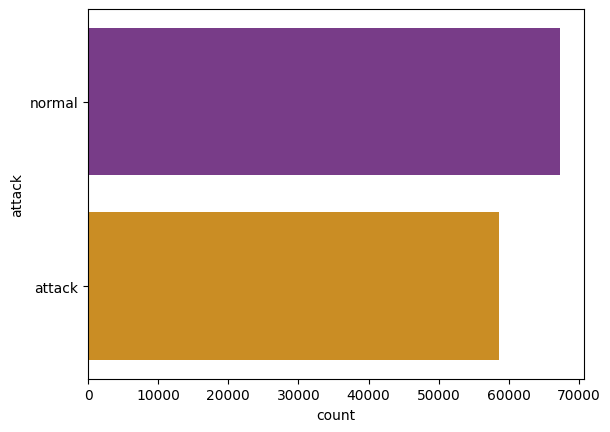

In [26]:
sns.countplot(data_Train.attack , palette = 'CMRmap')

C:\Users\HP\AppData\Local\Temp\ipykernel_3988\576188816.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data_Train[ 'protocol_type'], palette ='CMRmap')


<Axes: xlabel='count', ylabel='protocol_type'>

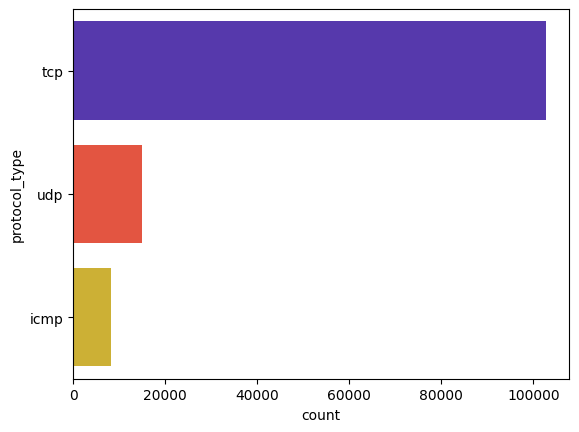

In [27]:
sns.countplot(data_Train[ 'protocol_type'], palette ='CMRmap')

<Axes: xlabel='protocol_type', ylabel='count'>

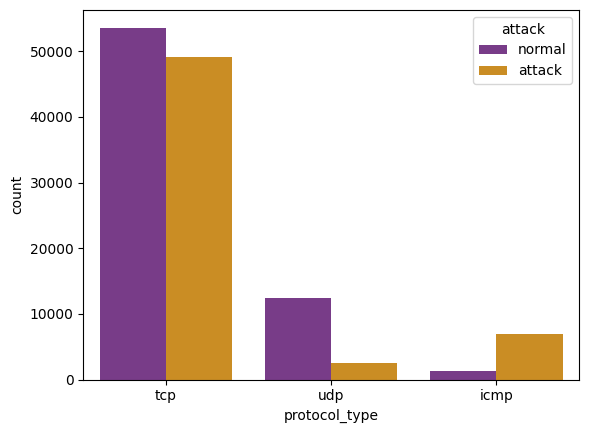

In [28]:
sns.countplot(x='protocol_type',hue='attack' , data = data_Train , palette ='CMRmap')

C:\Users\HP\AppData\Local\Temp\ipykernel_3988\728818376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(palette='mako', y='service' , data=data_Train, order = data_Train['service'].value_counts().index)


<Axes: xlabel='count', ylabel='service'>

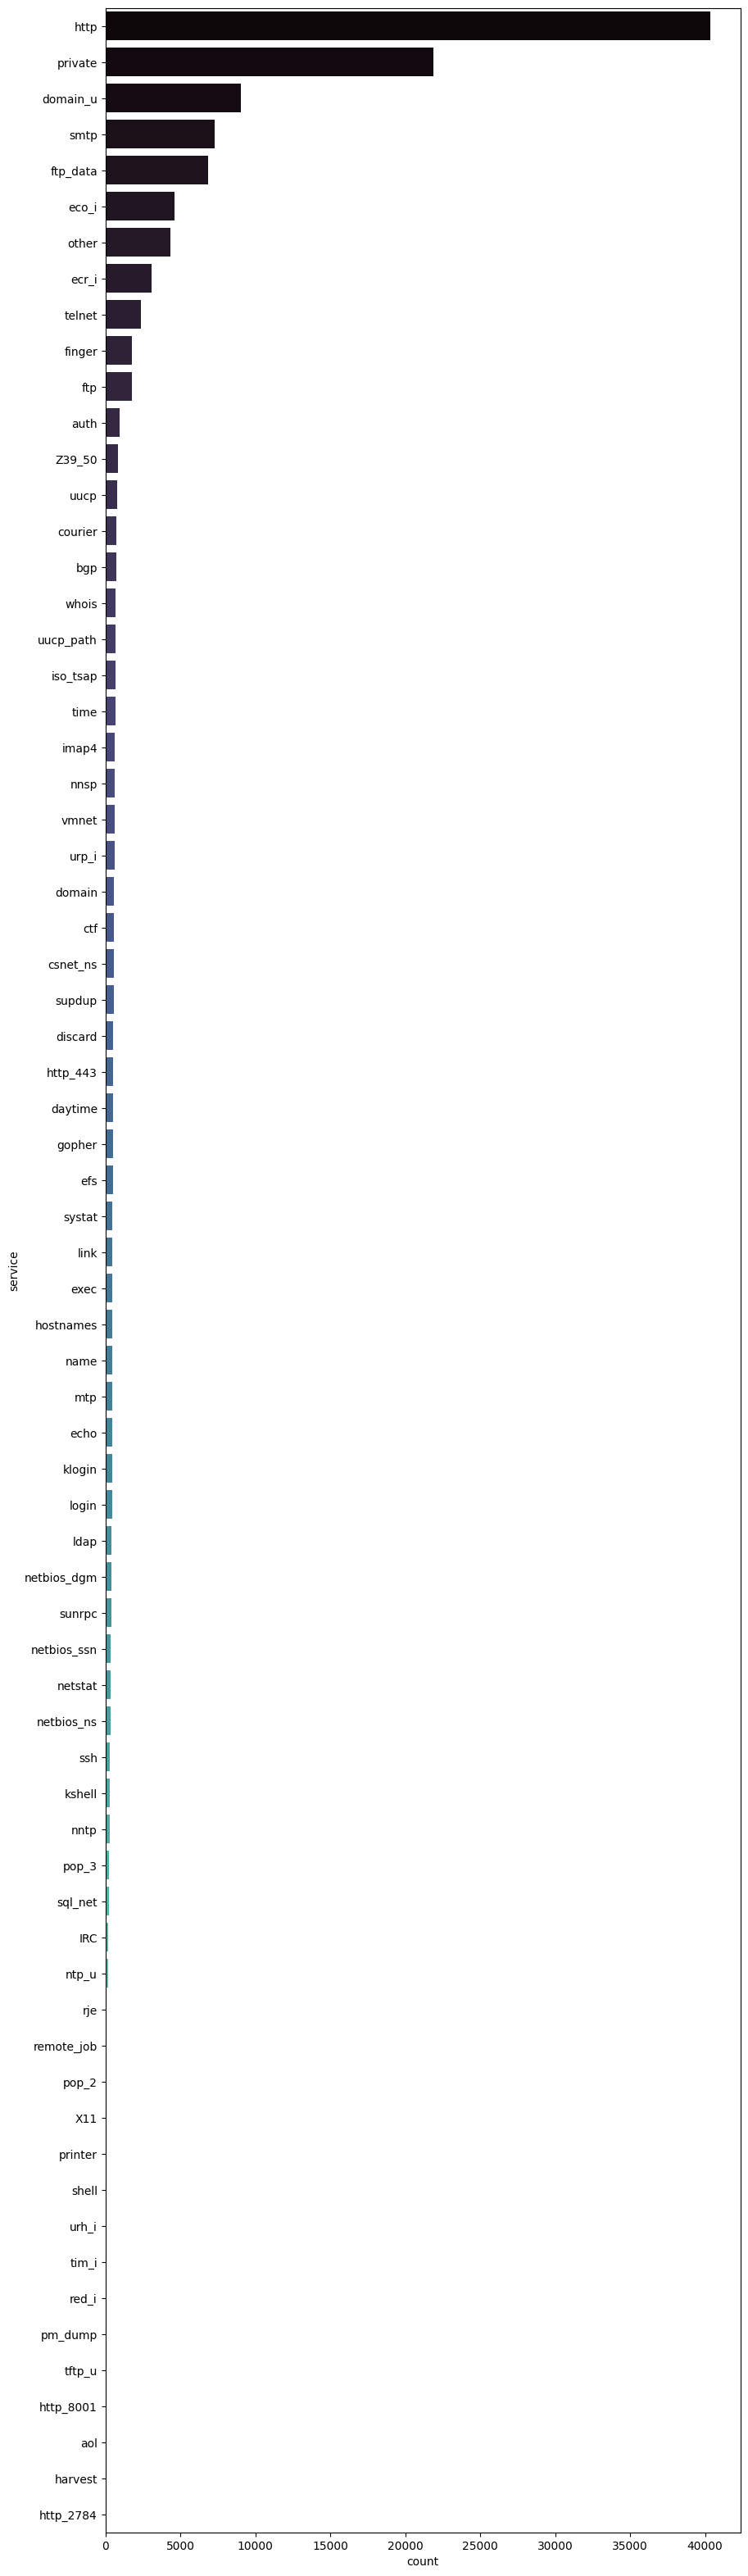

In [29]:
plt.figure(figsize=(10,40))
sns.countplot(palette='mako', y='service' , data=data_Train, order = data_Train['service'].value_counts().index)

<Axes: xlabel='flag', ylabel='count'>

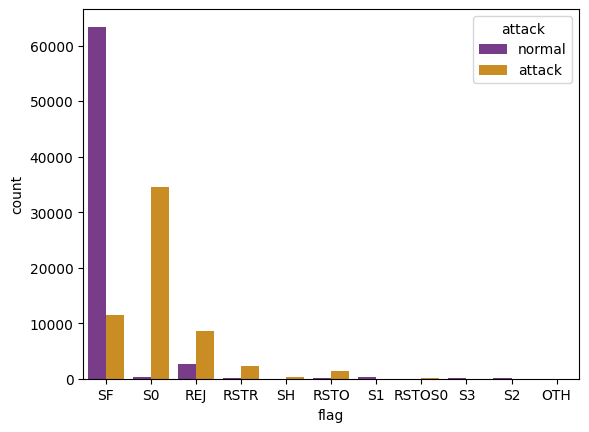

In [30]:
sns.countplot(x='flag',hue='attack' , data = data_Train , palette ='CMRmap')

-------------------------------------
## Data Encode

In [31]:
data_obj = data_Train.select_dtypes(['object']).columns

In [32]:
data_Train["attack"].value_counts()

attack
normal    67343
attack    58630
Name: count, dtype: int64

In [33]:
data_obj

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()

In [35]:
data_Train['protocol_type'] = protocol_type_le.fit_transform(data_Train['protocol_type'])
data_Train['service'] = service_le.fit_transform(data_Train['service'])
data_Train['flag'] = flag_le.fit_transform(data_Train['flag'])

In [36]:
attack_n = []
for i in data_Train.attack :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
data_Train['attack'] = attack_n

In [37]:
data_Train['attack'].value_counts()

attack
0    67343
1    58630
Name: count, dtype: int64

now,data is encoded

<Axes: >

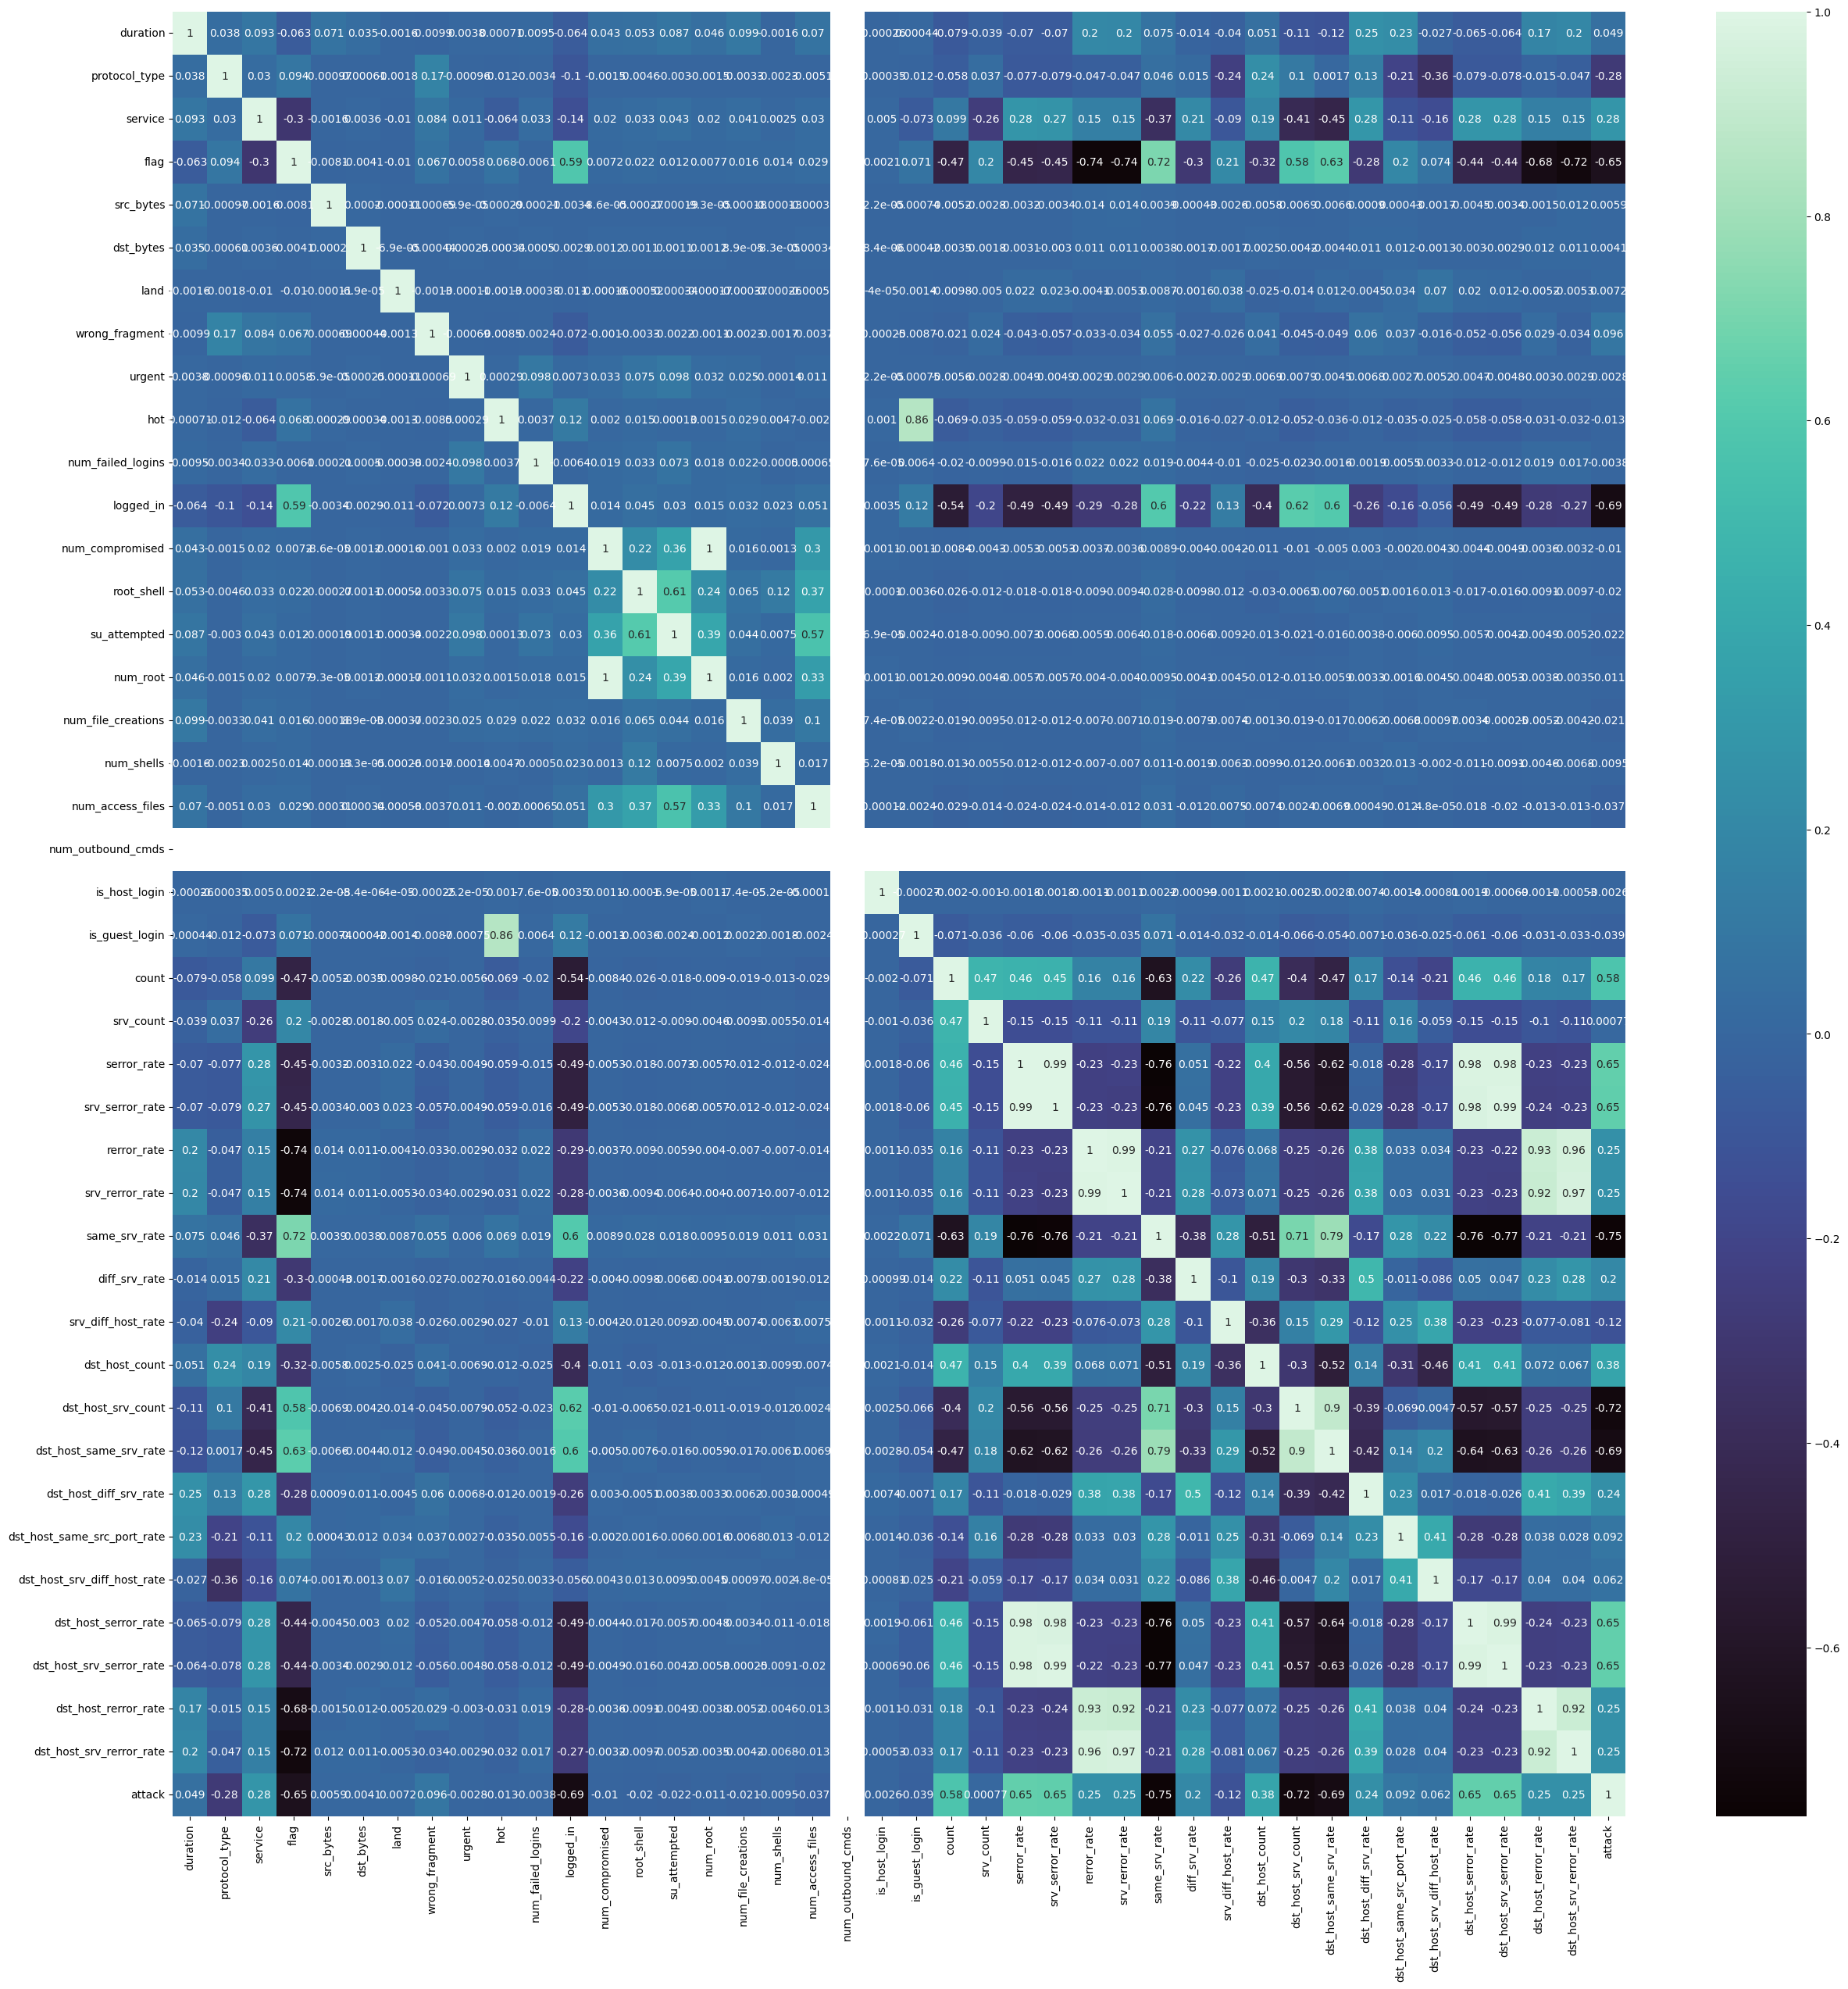

In [38]:
plt.figure(figsize=(30,30))
sns.heatmap(data_Train.corr(), annot= True,cmap='mako')

-----------------------------------
## Data Split

In [39]:
y = data_Train['attack'].copy()
x = data_Train.drop(['attack'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

------------------------------------------
## **Data Scall**

In [40]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)

------------------------------
## **Data Modeling**


### SVM Model


#### Linear Kernal SVC

In [41]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
Y_pred =lin_svc.predict(x_test)
print('The Training accuracy = ',lin_svc.score(x_train, y_train))
print('The Testing accuracy = ',lin_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

The Training accuracy =  0.9553078327530874
The Testing accuracy =  0.9563928873835732
------------------------------------------------
linearSVC  accuracy  : 0.956


In [42]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     20067
           1       0.97      0.94      0.95     17725

    accuracy                           0.96     37792
   macro avg       0.96      0.96      0.96     37792
weighted avg       0.96      0.96      0.96     37792



-------------------------------
#### RBF Kernal

In [43]:

rbf_svc = svm.SVC(kernel='rbf').fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

The Training accuracy =  0.9922092060647986
The Testing accuracy =  0.9912944538526672
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.991


In [44]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



------------------------------
#### Poly Kernal

In [45]:
svclassifier_poly = SVC(kernel='poly')
poly = svclassifier_poly.fit(x_train,y_train)
Y_pred_poly =svclassifier_poly.predict(x_test)
print('The Training accuracy = ',poly.score(x_train, y_train))
print('The Testing accuracy = ',poly.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'poly')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_poly),3)))
print(classification_report(y_test,Y_pred_poly))

The Training accuracy =  0.9916875517401708
The Testing accuracy =  0.9897861981371718
------------------------------------------------
SVM (kernel: 'poly')  accuracy  : 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [46]:
print(classification_report(y_test,Y_pred_poly))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



--------------------------
#### Grid Search

In [48]:
param_grid = {'C': [0.2,0.5,1], 'gamma': [0.5],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid ,verbose=2, cv= 3,refit=False)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.0min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.0min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time=21.4min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 2.8min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 2.1min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 2.2min


,estimator,SVC()
,param_grid,"{'C': [0.2, 0.5, ...], 'gamma': [0.5], 'kernel': ['rbf']}"
,scoring,None
,n_jobs,None
,refit,False
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1.0


In [49]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [50]:
rbf_svc = svm.SVC(kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'], C=grid.best_params_['C']).fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)
print(rbf_svc.score(x_train, y_train))
print(rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

0.9976752361619851
0.9935436071126165
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.994


In [51]:
print(classification_report(y_test,Y_pred_rbf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [52]:
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "mako", annot=annot, fmt='', ax=ax)

C:\Users\HP\AppData\Local\Temp\ipykernel_3988\2836768641.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


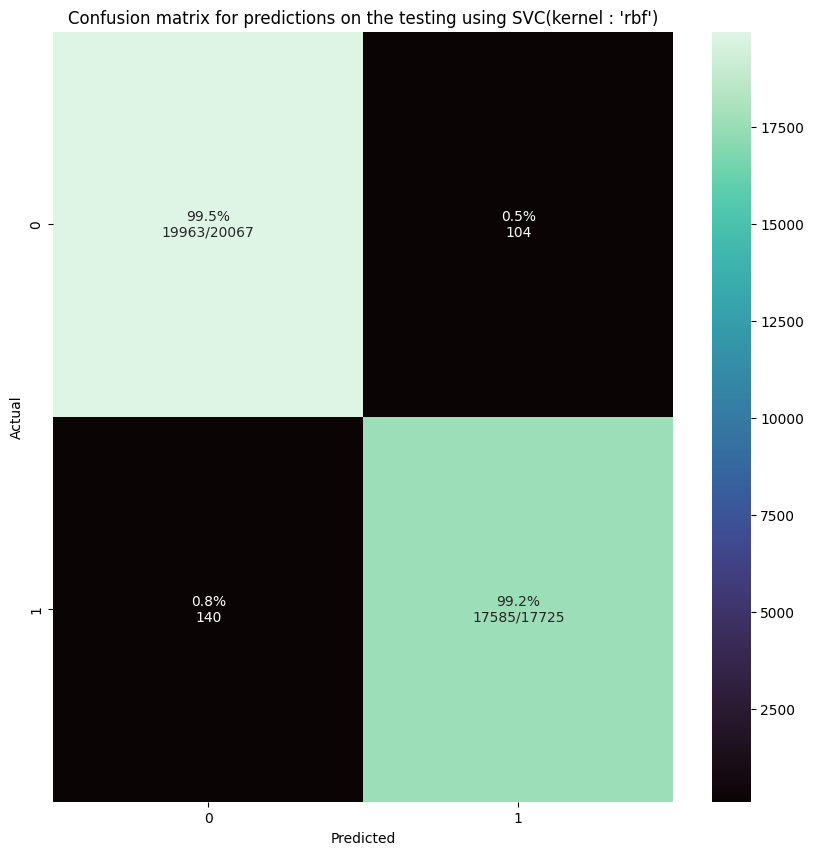

In [53]:
plot_cm(y_test,Y_pred_rbf, 'Confusion matrix for predictions on the testing using SVC(kernel : \'rbf\')')